In [20]:
import pandas as pd
import numpy as np
import linear_model
import imp
imp.reload(linear_model)

<module 'linear_model' from '/Users/kwon-yong-geun/workspace/TIL/TIL/machine_learning/chapter6_linear_regression/lab_gradient_descent/linux_mac/linear_model.py'>

## Single Variable

In [21]:
df = pd.read_csv("./train.csv")
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [22]:
X = df["x"].values.reshape(-1,1)
y = df["y"].values

In [23]:
lr = linear_model.LinearRegressionGD(eta0=0.0001, epochs=500000, weight_decay=1)
lr.fit(X, y)
lr.intercept # -0.12015404827836433
lr.coef # array([ 1.00077823])
lr.predict(X)[:10]

array([23.89852242, 49.91875687, 14.89151819, 37.9094179 , 86.94755205,
       35.9078614 , 11.88918345, 80.94288256, 24.89930067,  4.88373571])

In [6]:
lr.intercept, lr.coef

(-0.12015553179862745, array([1.00077825]))

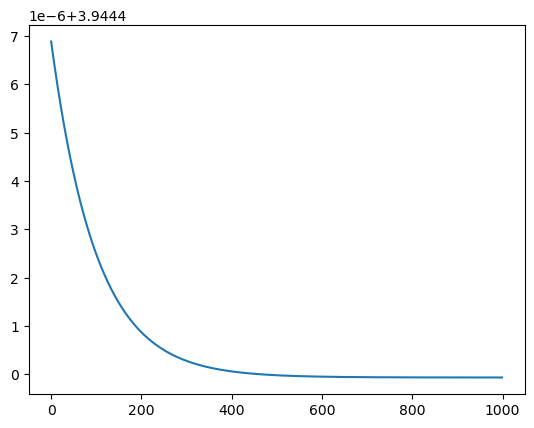

In [7]:
import matplotlib.pyplot as plt
plt.plot(lr.cost_history[1000:2000])
plt.show()

In [10]:
from sklearn import linear_model
sk_lr = linear_model.LinearRegression()
sk_lr.fit(X, y)
sk_lr.intercept_ # -0.1201555318131966
sk_lr.coef_ # array([ 1.00077825])
np.isclose(lr.coef, sk_lr.coef_) #True

array([ True])

## Multiple variable

In [12]:
df = pd.read_csv("./mlr09.csv")
df.head()

,height_in_feet,weight_in_pounds,successful_field_goals,percent_of_successful_free_throws,average_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [13]:
y = df["average_points_scored"].values
X = df.iloc[:,:-1].values
mu_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
rescaled_X = (X - mu_X) / std_X # RESCALED

In [14]:
lr.fit(rescaled_X, y)
lr.coef # array([-1.67758077, 0.28337482, 2.68587788, 1.12815751])
lr.intercept # 11.790740740731859

In [16]:
lr.coef, lr.intercept

(array([-1.67779283,  0.28359762,  2.68586629,  1.12816882]),
 11.790740740731865)

In [17]:
sk_lr.fit(rescaled_X, y)
sk_lr.coef_ # array([-1.67779283, 0.28359762, 2.68586629, 1.12816882])
sk_lr.intercept_ # 11.790740740740736

11.790740740740736

In [18]:
sk_lr.coef_ , sk_lr.intercept_ 

(array([-1.67779283,  0.28359762,  2.68586629,  1.12816882]),
 11.790740740740736)